#### Prerequisites

**Note:** Before your the cells below, make sure to choose Python 3 (TensorFlow 2.3 Python 3.7 CPU Optimized)

In [1]:
%%capture

!pip install bbox-visualizer
!pip install matplotlib

#### Imports 

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
import bbox_visualizer as bbv
import sagemaker
import logging
import json
import cv2

##### Setup logger

In [4]:
logger = logging.getLogger('__name__')
logger.setLevel(logging.DEBUG)
logger.addHandler(logging.StreamHandler())

### Explore images with bounding boxes for facial mask detection

In [5]:
with open('./data/annotations.json') as f:
    annotations_dict = json.load(f)
images_list = annotations_dict['images']
annotations_list = annotations_dict['annotations']

In [6]:
def find_bboxes(id_):
    id_ = int(id_.replace('.png', ''))
    bboxes = []
    for annotation in annotations_list:
        if annotation['image_id'] == id_:
            bboxes.append(annotation['bbox'])
    return bboxes

In [7]:
def show_image_with_bboxes(file_name, bboxes):
    img = cv2.imread(f'./data/images/{file_name}')
    logger.info(f'Image: {file_name}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = bbv.draw_multiple_rectangles(img, bboxes)
    plt.imshow(img)
    plt.show()

Image: 1.png


[[62, 215, 98, 259], [129, 213, 198, 267], [376, 201, 427, 269], [528, 264, 544, 284], [573, 201, 648, 276], [767, 150, 858, 256], [545, 293, 562, 310], [931, 284, 956, 307]]


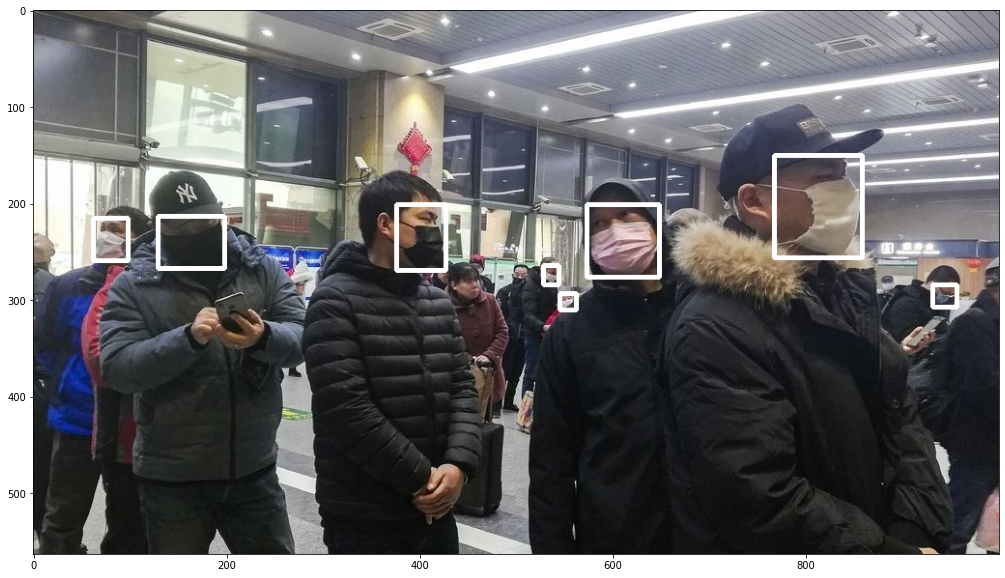

Image: 2.png


[[1457, 595, 1770, 953], [2153, 782, 2395, 1143]]


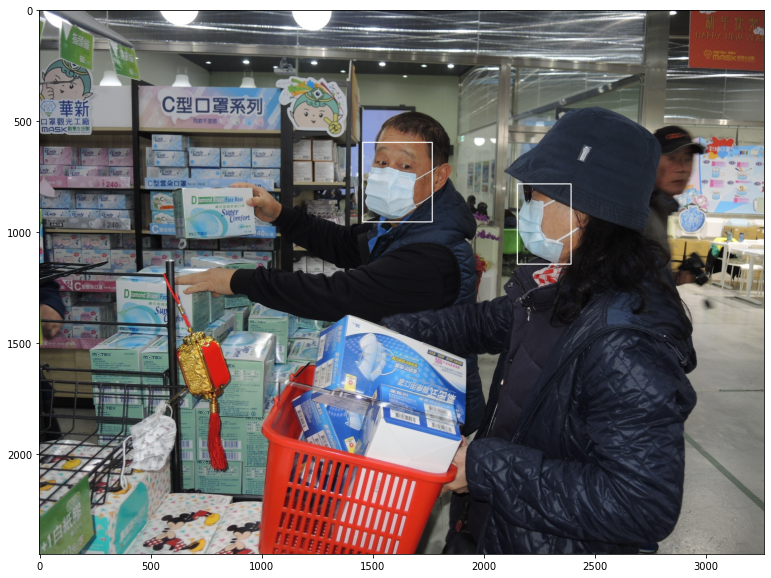

Image: 3.png


[[16, 143, 95, 208], [504, 98, 585, 208], [467, 115, 506, 171], [737, 107, 782, 148]]


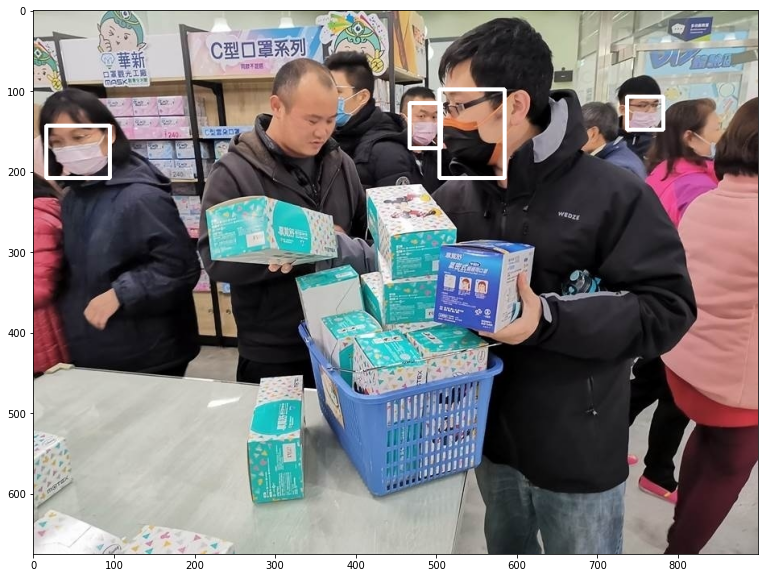

Image: 4.png


[[10, 727, 107, 828], [133, 642, 227, 739], [93, 272, 149, 350], [10, 248, 62, 313], [389, 29, 466, 101], [335, 205, 411, 268], [346, 397, 413, 477], [488, 771, 590, 862], [700, 622, 793, 693], [762, 681, 866, 771], [674, 338, 757, 418], [650, 206, 740, 282], [665, 98, 747, 163], [887, 397, 957, 469], [913, 199, 989, 279], [1034, 194, 1117, 278], [1293, 533, 1393, 599], [1242, 268, 1330, 341], [1150, 146, 1217, 210], [1148, 50, 1213, 106]]


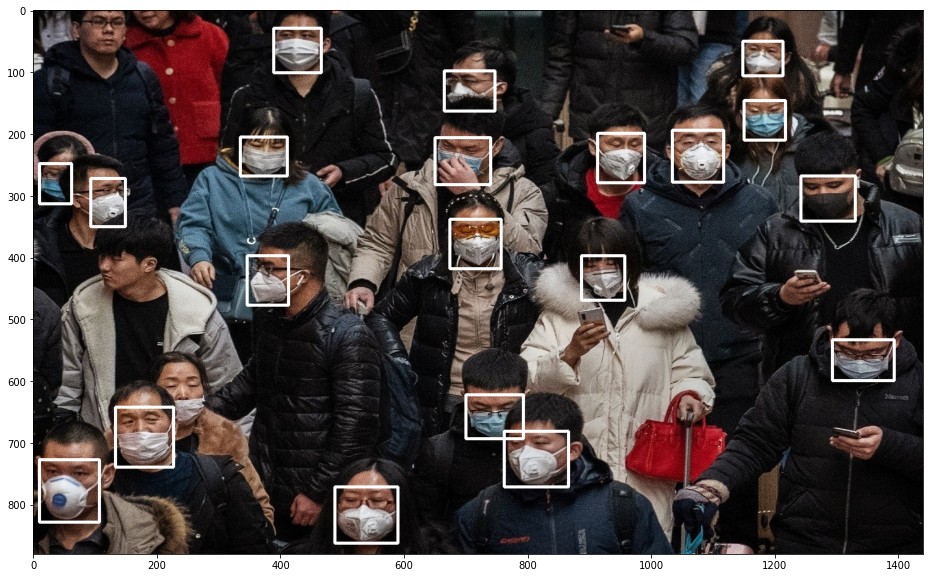

Image: 5.png


[[392, 164, 748, 522]]


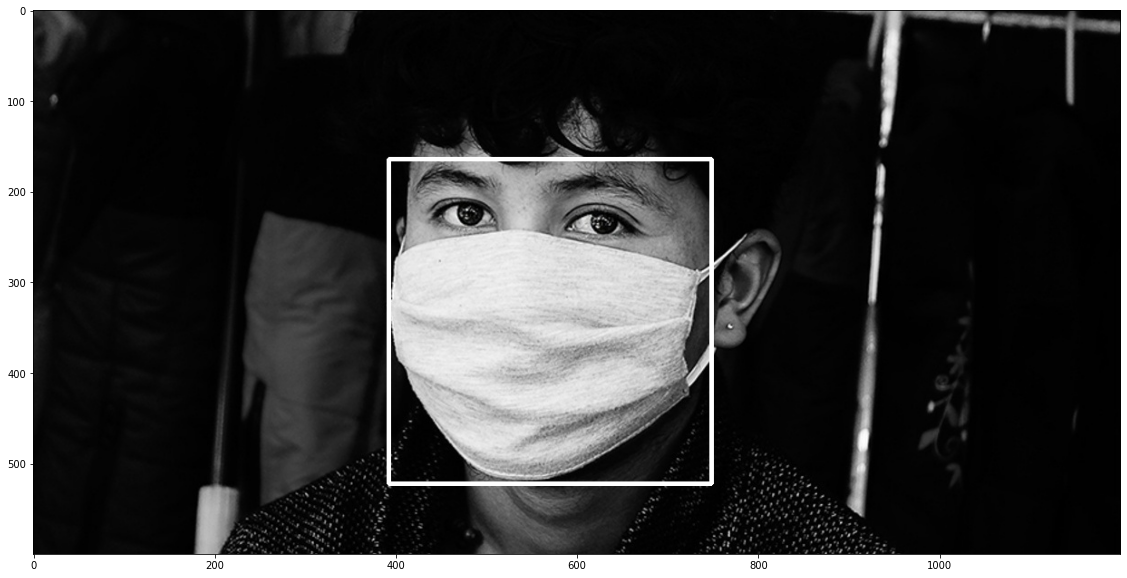

In [8]:
i = 0
for image, annotations in zip(images_list, annotations_list):
    file_name = image['file_name']
    bboxes = find_bboxes(file_name)
    print(bboxes)
    show_image_with_bboxes(file_name, bboxes)
    if i == 4:
        break
    i += 1

#### Copy images from local to S3

In [9]:
session = sagemaker.Session()
default_bucket = session.default_bucket()
print(f'Default S3 bucket = {default_bucket}')

Default S3 bucket = sagemaker-us-east-1-119174016168


##### Remove checkpoints if any

In [10]:
!rm -rf ./data/.ipynb_checkpoints/
!rm -rf ./data/images/.ipynb_checkpoints/

In [11]:
%%capture

!aws s3 cp ./data/ s3://{default_bucket}/mask-detection/ --recursive